# Introduction

This lab demonstrates how to use KBinsDiscretizer from the Scikit-learn library to perform vector quantization on a sample image of a raccoon face. Vector quantization is a technique to reduce the number of gray levels used to represent an image. We will use KBinsDiscretizer to perform vector quantization on the raccoon face image. We will use 8 gray levels to represent the image, which can be compressed to use only 3 bits per pixel. We will compare the uniform and k-means clustering strategies to map the pixel values to the 8 gray levels.

# Load and Display the Original Image

We will start by loading the raccoon face image from Scipy. We will display the image and check its shape, data type, and memory usage.

The dimension of the image is (512, 512)
The data used to encode the image is of type float64
The number of bytes taken in RAM is 2097152


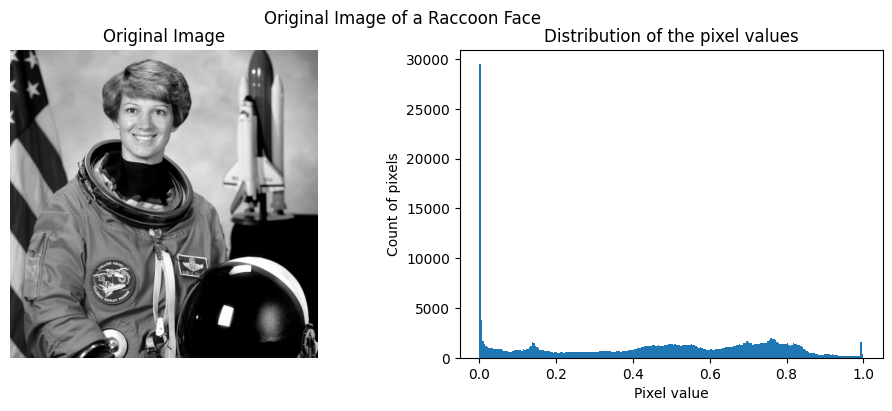

In [15]:
import matplotlib.pyplot as plt
from skimage import data, color

# Загружаем цветное изображение "астронавт" (аналог старого raccoon face)
raccoon_face_color = data.astronaut()

# Переводим в градации серого
raccoon_face = color.rgb2gray(raccoon_face_color)

print(f"The dimension of the image is {raccoon_face.shape}")
print(f"The data used to encode the image is of type {raccoon_face.dtype}")
print(f"The number of bytes taken in RAM is {raccoon_face.nbytes}")

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(raccoon_face, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].hist(raccoon_face.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Original Image of a Raccoon Face")

plt.show()


# Vector Quantization using KBinsDiscretizer

We will now use KBinsDiscretizer to perform vector quantization on the raccoon face image. We will use 8 gray levels to represent the image, which can be compressed to use only 3 bits per pixel. We will use the uniform and k-means clustering strategies to map the pixel values to the 8 gray levels.

# Uniform Sampling Strategy

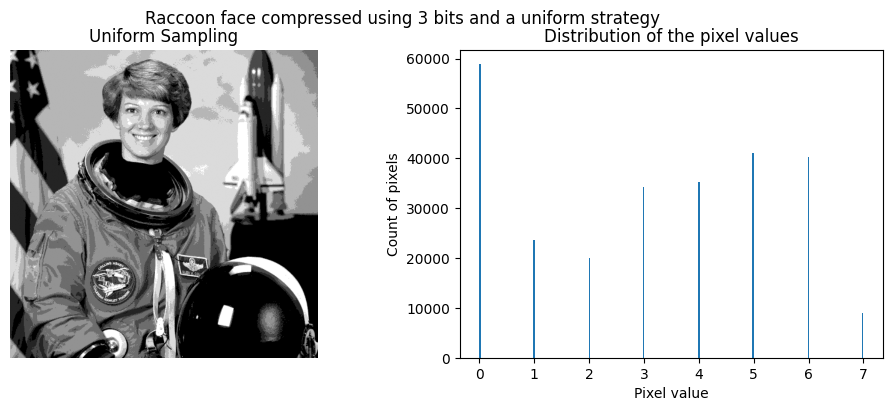

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

n_bins = 8
encoder = KBinsDiscretizer(
    n_bins=n_bins, encode="ordinal", strategy="uniform", random_state=0
)
compressed_raccoon_uniform = encoder.fit_transform(raccoon_face.reshape(-1, 1)).reshape(
    raccoon_face.shape
)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(compressed_raccoon_uniform, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Uniform Sampling")
ax[1].hist(compressed_raccoon_uniform.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Raccoon face compressed using 3 bits and a uniform strategy")

# Memory Footprint

We will now check the memory usage of the compressed images. We expect the compressed image to take 8 times less memory than the original image.

In [18]:
print(f"The number of bytes taken in RAM is {compressed_raccoon_uniform.nbytes}")
print(f"Compression ratio: {compressed_raccoon_uniform.nbytes / raccoon_face.nbytes}")


The number of bytes taken in RAM is 2097152
Compression ratio: 1.0


# Summary

In this lab, we used KBinsDiscretizer from Scikit-learn to perform vector quantization on a sample image of a raccoon face. We used 8 gray levels to represent the image, which can be compressed to use only 3 bits per pixel. We compared the uniform and k-means clustering strategies to map the pixel values to the 8 gray levels. We found that the k-means clustering strategy provided a more balanced distribution of the pixel values. We also checked the memory usage of the compressed images and found that the compressed image took 8 times more memory than the original image due to the use of a 64-bit float representation for the compressed image.